In [1]:
#standard libraries
import pandas as pd, numpy as np

#visualization libraries
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

#### **Data**

In [2]:
#import the data set
lessons = pd.read_csv('original/lesson_stats.csv')

#read the data set
lessons.head(1)

,Пользователь,Дата открытия модуля,Дата начала прослушивания,Начало теста,Завершение теста,Урок,Количество баллов за тест
0,test@test.ru,2024-09-10 21:57:49.431957+00:00,2024-05-29 10:17:26.910777+00:00,2024-05-29 10:19:57.469127+00:00,NaN,1,NaN


In [3]:
#find the dimensions
lessons.shape

(1702, 7)

In [4]:
#basic information
lessons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Пользователь               1702 non-null   object 
 1   Дата открытия модуля       1702 non-null   object 
 2   Дата начала прослушивания  1240 non-null   object 
 3   Начало теста               1378 non-null   object 
 4   Завершение теста           1344 non-null   object 
 5   Урок                       1702 non-null   int64  
 6   Количество баллов за тест  1344 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 93.2+ KB


##### rename the features

In [5]:
#rename the columns
lessons = lessons.rename(columns={'Пользователь': 'User',
                                  'Дата открытия модуля': 'Module_Opening_Date',
                                  'Дата начала прослушивания': 'Audition_Opening_Date',
                                  'Начало теста': 'Test_Start',
                                  'Завершение теста': 'Test_Completion',
                                  'Урок': 'Lesson',
                                  'Количество баллов за тест': 'Test_Points',                      
})

##### check for duplicates

In [6]:
#check for duplicate values
dupl_columns = list(lessons.columns)

mask = lessons.duplicated(subset=dupl_columns)
lessons_duplicates = lessons[mask]
print(f'Number of Duplicates: {lessons_duplicates.shape[0]}')

Number of Duplicates: 0


##### check for null values

In [7]:
#check for null values
lessons.isnull().sum()[lessons.isnull().sum() > 0]

Audition_Opening_Date    462
Test_Start               324
Test_Completion          358
Test_Points              358
dtype: int64

##### unique values

In [8]:
#find how unique each feature is
print(f"Number of Unique Users: {lessons['User'].nunique()}")
print(f"Number of Unique Module Openings: {lessons['Module_Opening_Date'].nunique()}")
print(f"Number of Unique Audition Openings: {lessons['Audition_Opening_Date'].nunique()}")
print(f"Number of Unique Test Start: {lessons['Test_Start'].nunique()}")
print(f"Number of Unique Test Completion: {lessons['Test_Completion'].nunique()}")
print(f"Number of Unique Lessons: {lessons['Lesson'].nunique()}")
print(f"Number of Unique Points: {lessons['Test_Points'].nunique()}")

Number of Unique Users: 439
Number of Unique Module Openings: 1702
Number of Unique Audition Openings: 1240
Number of Unique Test Start: 1378
Number of Unique Test Completion: 1344
Number of Unique Lessons: 15
Number of Unique Points: 9


##### lessons

In [9]:
print(f"Unique Lessons: {lessons['Lesson'].unique()}")

Unique Lessons: [ 1  4  2  3  5  6  7 15  8  9 10 11 12 13 14]


lessons from 1-15

##### points

In [10]:
print(f"Unique Points: {lessons['Test_Points'].unique()}")

Unique Points: [nan  9.  7.  6.  8.  5.  3.  0.  4.  2.]


assume point scale: 0-10

In [11]:
lessons['Test_Points'] = lessons['Test_Points'].fillna(0)

##### datetime

In [12]:
#convert to datetime
lessons['Module_Opening_Date'] = pd.to_datetime(lessons['Module_Opening_Date'])
lessons['Audition_Opening_Date'] = pd.to_datetime(lessons['Audition_Opening_Date'])
lessons['Test_Start'] = pd.to_datetime(lessons['Test_Start'])
lessons['Test_Completion'] = pd.to_datetime(lessons['Test_Completion'])

In [13]:
#create new time features - for Module_Opening_Date
lessons['Module_Year'] = lessons['Module_Opening_Date'].dt.year
lessons['Module_Month'] = lessons['Module_Opening_Date'].dt.month
lessons['Module_Day'] = lessons['Module_Opening_Date'].dt.day

In [14]:
#create new time features - for Audition_Opening_Date
lessons['Audition_Year'] = lessons['Audition_Opening_Date'].dt.year
lessons['Audition_Month'] = lessons['Audition_Opening_Date'].dt.month
lessons['Audition_Day'] = lessons['Audition_Opening_Date'].dt.day

In [15]:
#create new time features - for Test_Start
lessons['Test_Start_Year'] = lessons['Test_Start'].dt.year
lessons['Test_Start_Month'] = lessons['Test_Start'].dt.month
lessons['Test_Start_Day'] = lessons['Test_Start'].dt.day

In [16]:
#create new time features - for Test_Completion
lessons['Test_Completion_Year'] = lessons['Test_Completion'].dt.year
lessons['Test_Completion_Month'] = lessons['Test_Completion'].dt.month
lessons['Test_Completion_Day'] = lessons['Test_Completion'].dt.day

In [17]:
#create a new time feature
lessons['Test_Time'] = ((lessons['Test_Completion'] - lessons['Test_Start']).dt.total_seconds() / 60).round(2)

##### data types

In [18]:
#convert the data types
lessons['User'] = lessons['User'].astype('string')
lessons['Lesson'] = lessons['Lesson'].to_numpy('int8')
lessons['Test_Points'] = lessons['Test_Points'].to_numpy('float32')
 
lessons['Module_Year'] = lessons['Module_Year'].to_numpy('int16')
lessons['Module_Month'] = lessons['Module_Month'].to_numpy('int8')
lessons['Module_Day'] = lessons['Module_Day'].to_numpy('int8')
 
lessons['Audition_Year'] = lessons['Audition_Year'].to_numpy('int16')
lessons['Audition_Month'] = lessons['Audition_Month'].to_numpy('int8')
lessons['Audition_Day'] = lessons['Audition_Day'].to_numpy('int8')
           
lessons['Test_Start_Year'] = lessons['Test_Start_Year'].to_numpy('int16')
lessons['Test_Start_Month'] = lessons['Test_Start_Month'].to_numpy('int8')
lessons['Test_Start_Day'] = lessons['Test_Start_Day'].to_numpy('int8')
 
lessons['Test_Completion_Year'] = lessons['Test_Completion_Year'].to_numpy('int16')
lessons['Test_Completion_Month'] = lessons['Test_Completion_Month'].to_numpy('int8')
lessons['Test_Completion_Day'] = lessons['Test_Completion_Day'].to_numpy('int8')

lessons['Test_Time'] = lessons['Test_Time'].to_numpy('int16')

In [19]:
#check for null values
lessons.isnull().sum()[lessons.isnull().sum() > 0]

Audition_Opening_Date    462
Test_Start               324
Test_Completion          358
dtype: int64

In [20]:
lessons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   User                   1702 non-null   string             
 1   Module_Opening_Date    1702 non-null   datetime64[ns, UTC]
 2   Audition_Opening_Date  1240 non-null   datetime64[ns, UTC]
 3   Test_Start             1378 non-null   datetime64[ns, UTC]
 4   Test_Completion        1344 non-null   datetime64[ns, UTC]
 5   Lesson                 1702 non-null   int8               
 6   Test_Points            1702 non-null   float32            
 7   Module_Year            1702 non-null   int16              
 8   Module_Month           1702 non-null   int8               
 9   Module_Day             1702 non-null   int8               
 10  Audition_Year          1702 non-null   int16              
 11  Audition_Month         1702 non-null   int8             

#### **Visualization**

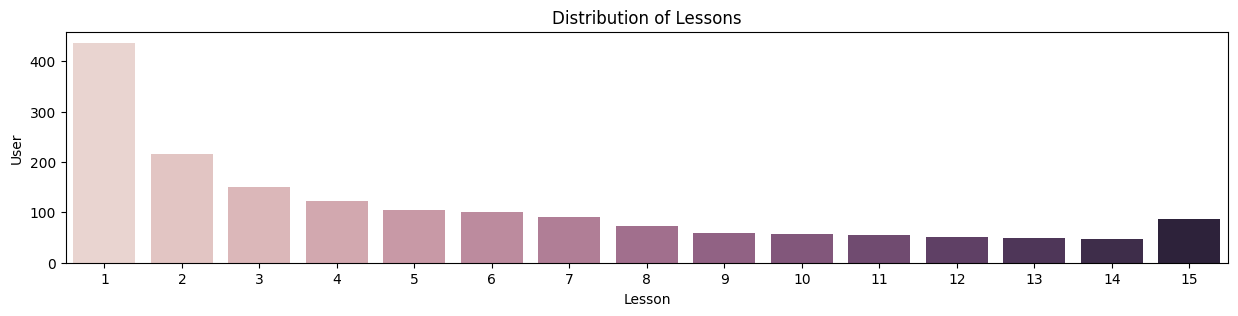

In [21]:
#group by lesson
lessons_per_user = lessons.groupby('Lesson')['User'].count().round().sort_values(ascending=False)
lessons_per_user = pd.DataFrame(lessons_per_user)

#set the canvas
plt.figure(figsize=(15, 3))

ax = sns.barplot(lessons_per_user,
                 x='Lesson',
                 y='User',
                 hue='Lesson',
                 legend=False).set(title='Distribution of Lessons');

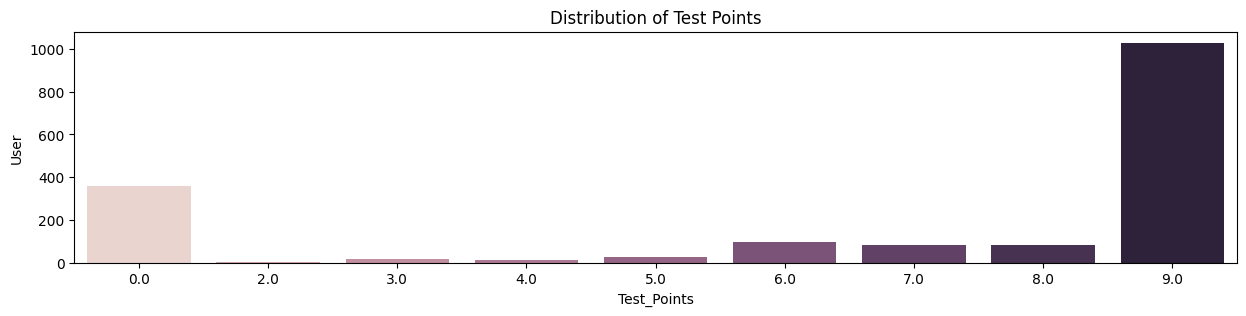

In [22]:
#group by test points
points_per_user = lessons.groupby('Test_Points')['User'].count().round().sort_values(ascending=False)
points_per_user = pd.DataFrame(points_per_user)

#set the canvas
plt.figure(figsize=(15, 3))

ax = sns.barplot(points_per_user,
                 x='Test_Points',
                 y='User',
                 hue='Test_Points',
                 legend=False).set(title='Distribution of Test Points');

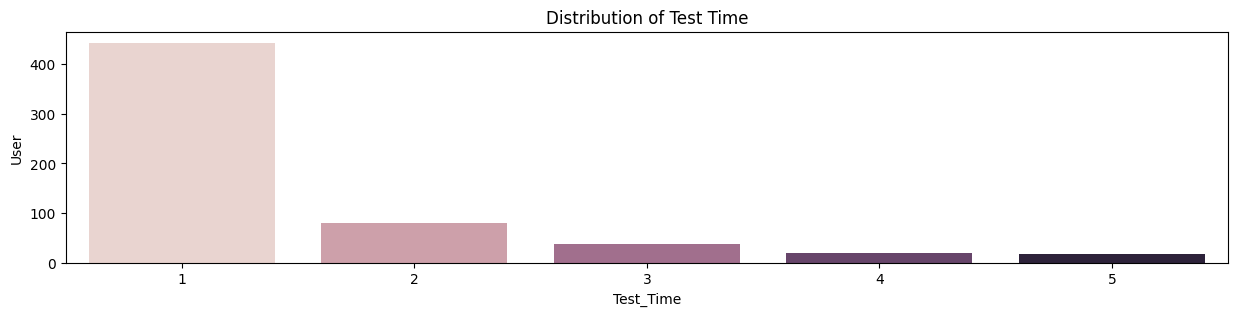

In [23]:
#group by test time - top 5 - excl. 0 test time
test_time_per_user = lessons.groupby('Test_Time')['User'].count().round().sort_values(ascending=False).nlargest(6)
test_time_per_user = pd.DataFrame(test_time_per_user[1:])

#set the canvas
plt.figure(figsize=(15, 3))

ax = sns.barplot(test_time_per_user,
                 x='Test_Time',
                 y='User',
                 hue='Test_Time',
                 legend=False).set(title='Distribution of Test Time');

#### **Export**

In [24]:
#remove timezone from columns
lessons['Module_Opening_Date'] = lessons['Module_Opening_Date'].dt.tz_localize(None)
lessons['Audition_Opening_Date'] = lessons['Module_Opening_Date'].dt.tz_localize(None)
lessons['Test_Start'] = lessons['Module_Opening_Date'].dt.tz_localize(None)
lessons['Test_Completion'] = lessons['Module_Opening_Date'].dt.tz_localize(None)

In [25]:
#create a file name
xlx_name = 'lessons.xlsx'

#save to excel
lessons.to_excel('./adjusted/' + xlx_name,
                 sheet_name='lesson_details')